### This Task performed as a part of cellula Internship 


#### Coded by: Omar Mamon Hamed

---

##### 1- Import lib needed 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

##### 2- Read data

In [6]:
data = pd.read_csv('first inten project.csv')
data.head(10)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
5,INN00006,1,0,0,2,Meal Plan 2,0,Room_Type 1,346,Offline,0,0,0,100.00,1,9/13/2016,Canceled
6,INN00007,1,1,1,4,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
7,INN00008,3,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
8,INN00009,1,1,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


In [7]:
# Rename unclear columns
data.rename(columns={
    'P-C': 'Previously Canceled',
    'P-not-C': 'Previously not Canceled',
    'repeated': 'Old Customer',
    'average price ': 'average price',
}, inplace=True)
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,Old Customer,Previously Canceled,Previously not Canceled,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


##### 3- Some statistics about data

In [8]:
# Display statistics of the dataset
data.describe(include='all')


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,Old Customer,Previously Canceled,Previously not Canceled,average price,special requests,date of reservation,booking status
count,36285,36285.000000,36285.000000,36285.000000,36285.000000,36285,36285.000000,36285,36285.000000,36285,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285,36285
unique,36285,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,NaN,NaN,NaN,NaN,NaN,553,2
top,INN36286,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,Online,NaN,NaN,NaN,NaN,NaN,10/13/2018,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,27842,NaN,28138,NaN,23221,NaN,NaN,NaN,NaN,NaN,254,24396
mean,NaN,1.844839,0.105360,0.810693,2.204602,NaN,0.030977,NaN,85.239851,NaN,0.025630,0.023343,0.153369,103.421636,0.619733,NaN,NaN
std,NaN,0.518813,0.402704,0.870590,1.410946,NaN,0.173258,NaN,85.938796,NaN,0.158032,0.368281,1.753931,35.086469,0.786262,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,NaN,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,57.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,NaN,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,NaN,NaN


In [9]:
# Get unique values for each column
market_segments = data['market segment type'].unique()
room_types = data['room type'].unique()
meal_types = data['type of meal'].unique()

# Print the unique values in a readable format
print("Unique Market Segment Types:")
print(", ".join(market_segments))

print("\nUnique Room Types:")
print(", ".join(room_types))

print("\nUnique Meal Types:")
print(", ".join(meal_types))

Unique Market Segment Types:
Offline, Online, Corporate, Aviation, Complementary

Unique Room Types:
Room_Type 1, Room_Type 4, Room_Type 2, Room_Type 6, Room_Type 5, Room_Type 7, Room_Type 3

Unique Meal Types:
Meal Plan 1, Not Selected, Meal Plan 2, Meal Plan 3


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  Old Customer              36285 non-null  int64  
 11  Previously Canceled       36285 non-null  int64  
 12  Previously not Canceled   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [11]:
#check duplicates
data.any().unique()

array([ True])

##### 4- Cleaning of data

In [12]:
data_cleaned = data.copy()

1. Correct date

#####  IMP -This Step ia afte checking the NaT rows (2 Cells Below)

In [13]:
# show the data in the row 2626 ,3677 , 5600
data_cleaned.loc[[2626, 3677, 5600]][['date of reservation']]

,date of reservation
2626,2018-2-29
3677,2018-2-29
5600,2018-2-29


In [14]:
# convert date of reservation to datetime format and check for nulls
data_cleaned['date of reservation'] = pd.to_datetime(data_cleaned['date of reservation'], errors='coerce')
data_cleaned['date of reservation'].isnull().sum()


np.int64(37)

In [15]:
# Show rows where 'date of reservation' is null
data_cleaned[data_cleaned['date of reservation'].isnull()][['date of reservation']].head(8)


,date of reservation
2626,NaT
3677,NaT
5600,NaT
6343,NaT
7648,NaT
8000,NaT
8989,NaT
9153,NaT


In [16]:
# drop null values in date of reservation
data_cleaned.dropna(subset=['date of reservation'], inplace=True)
data_cleaned['date of reservation'].head()

0   2015-10-02
1   2018-11-06
2   2018-02-28
3   2017-05-20
4   2018-04-11
Name: date of reservation, dtype: datetime64[ns]

In [17]:
# Extract the year, month, and day from the date of reservation
data_cleaned['reservation_year'] = data_cleaned['date of reservation'].dt.year
data_cleaned['reservation_month'] = data_cleaned['date of reservation'].dt.month
data_cleaned['reservation_day'] = data_cleaned['date of reservation'].dt.day

# Drop the date of reservation column
data_cleaned.drop('date of reservation', axis=1, inplace=True)

# Display the first few rows of the encoded dataframe
data_cleaned.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,Old Customer,Previously Canceled,Previously not Canceled,average price,special requests,booking status,reservation_year,reservation_month,reservation_day
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled,2015,10,2
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018,11,6
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled,2018,2,28
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled,2017,5,20
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled,2018,4,11


2. Checking outliers

Text(0.5, 1.0, 'Lead Time Boxplot')

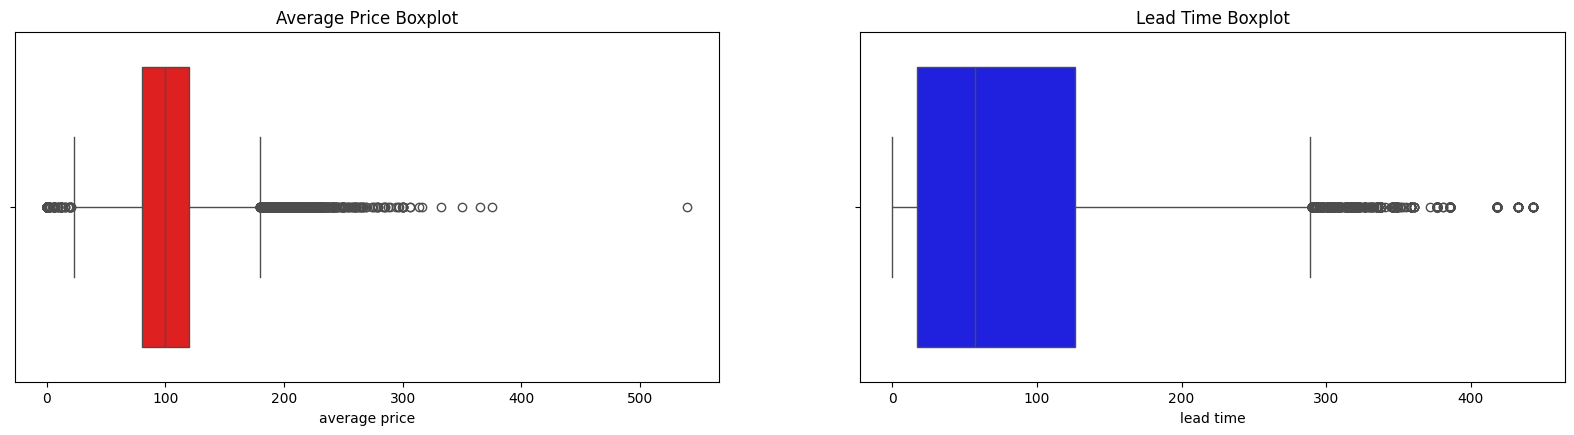

In [18]:
# Check outliers average price, lead time, number of children, number of adults
plt.figure(figsize=(20, 10))    
plt.subplot(2, 2, 1)
sns.boxplot(x=data_cleaned['average price'], color='red')
plt.title('Average Price Boxplot')

plt.subplot(2, 2, 2)
sns.boxplot(x=data_cleaned['lead time'], color='blue')
plt.title('Lead Time Boxplot')


C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_13564\2458477379.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '85.28236040609137' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_cleaned.loc[data_cleaned['lead time'] >q3 , 'lead time'] = mean_lead_time


Text(0.5, 1.0, 'Lead Time Boxplot')

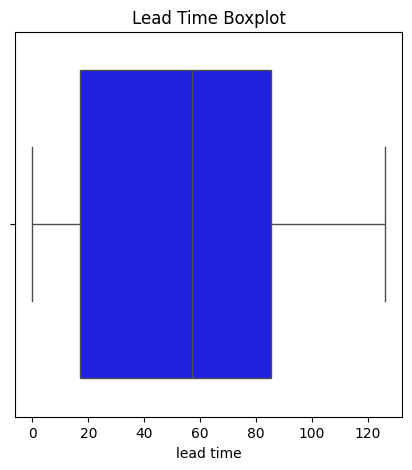

In [19]:
# fill lead time outliers with mean
mean_lead_time = data_cleaned['lead time'].mean()

# get q3
q3 = data_cleaned['lead time'].quantile(0.75)

# fill outliers with mean
data_cleaned.loc[data_cleaned['lead time'] >q3 , 'lead time'] = mean_lead_time

# draw boxplot again
plt.figure(figsize=(5, 5))
sns.boxplot(x=data_cleaned['lead time'], color='blue')
plt.title('Lead Time Boxplot')

C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_13564\3679685601.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='market segment type', y='average price', data=data, palette='viridis')


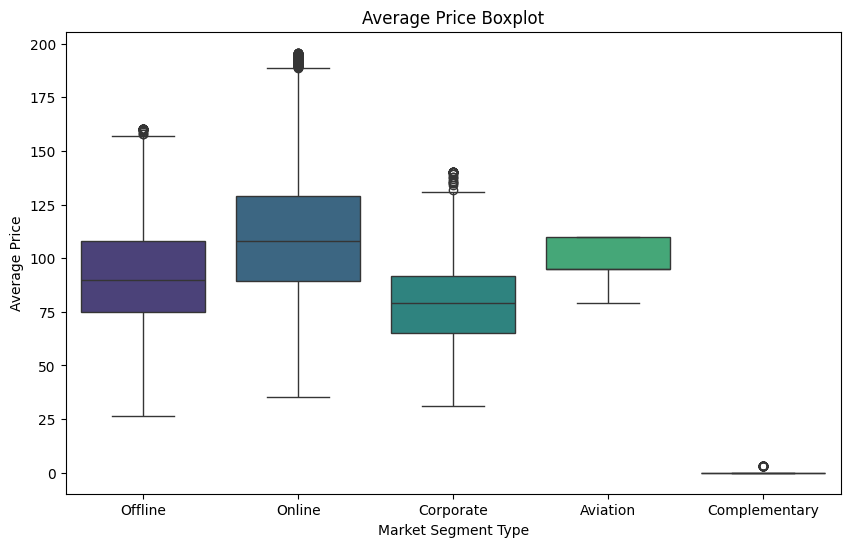

In [20]:
# Average Price fill outliers with mean depending on the market segment type ['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary']

# Calculate the mean average price for each market segment type
market_segment_means = data.groupby('market segment type')['average price'].mean().to_dict()

# Fill outliers in 'average price' with the mean of the corresponding market segment type
for segment in data['market segment type'].unique():
    mean_price = market_segment_means[segment]
    
    # Calculate Q1, Q3, and IQR
    segment_data = data[data['market segment type'] == segment]
    q1 = segment_data['average price'].quantile(0.25)
    q3 = segment_data['average price'].quantile(0.75)
    iqr = q3 - q1

    # Define lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Replace outliers with the segment mean
    data.loc[(data['market segment type'] == segment) & 
             ((data['average price'] < lower_bound) | (data['average price'] > upper_bound)), 
             'average price'] = mean_price

# Draw the boxplot again for each maeket segment type
plt.figure(figsize=(10, 6))
sns.boxplot(x='market segment type', y='average price', data=data, palette='viridis')
plt.title('Average Price Boxplot')
plt.xlabel('Market Segment Type')
plt.ylabel('Average Price')
plt.show()


##### 5- Encode the columns to make correclation matrix

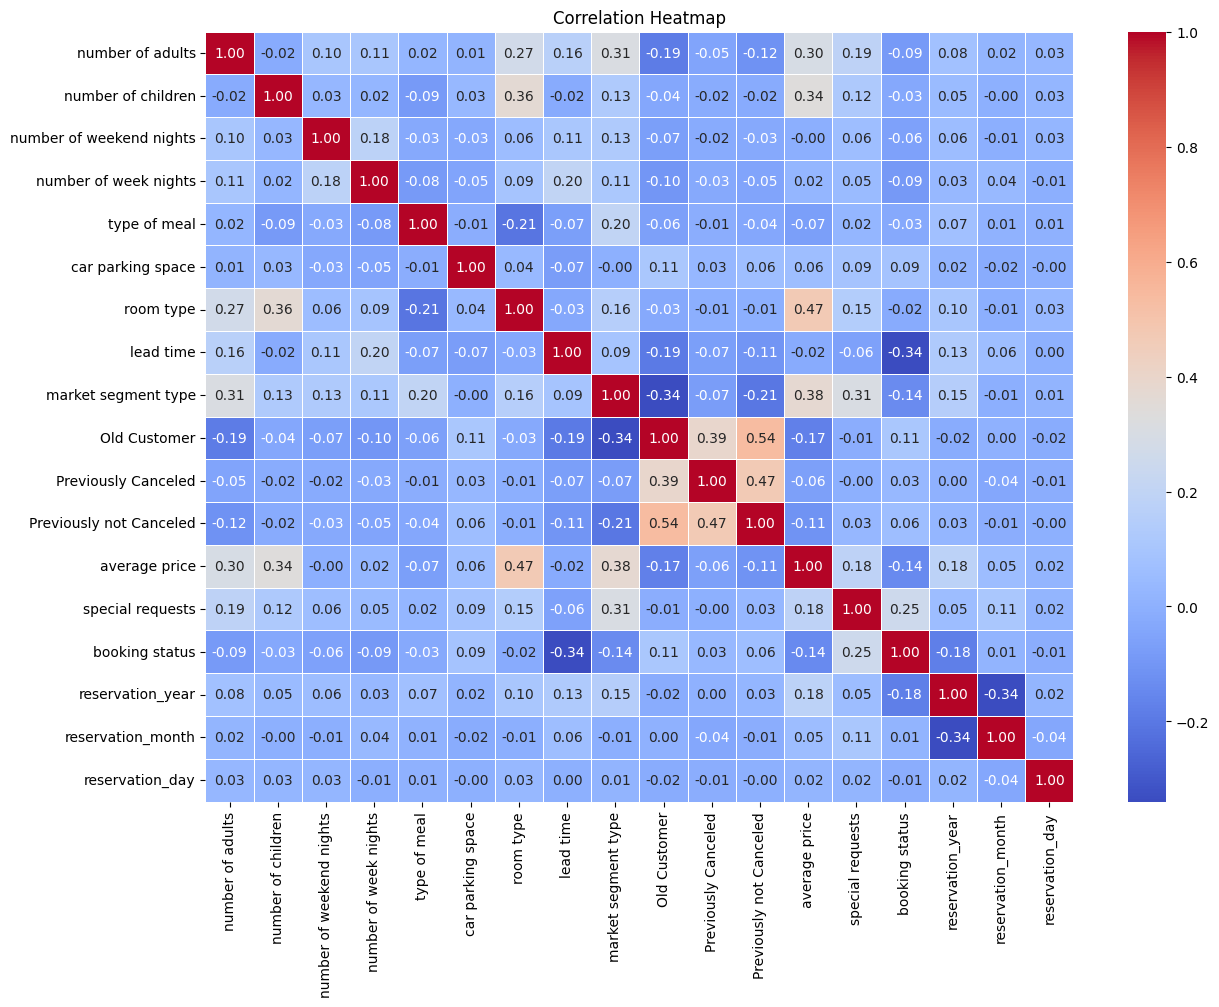

In [21]:
# drop booking id
data_cleaned.drop('Booking_ID', axis=1 , inplace=True) 

# Apply Label Encoding
le = LabelEncoder()
data_cleaned['room type'] = le.fit_transform(data_cleaned['room type'])
data_cleaned['type of meal'] = le.fit_transform(data_cleaned['type of meal'])
data_cleaned['market segment type'] = le.fit_transform(data_cleaned['market segment type'])
data_cleaned['booking status'] = le.fit_transform(data_cleaned['booking status'])

# Compute and Visualize the Correlation Matrix
plt.figure(figsize=(14, 10))
corr_matrix = data_cleaned.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


---

##### 6- Informative Graphics and Insights


In [22]:
# save the cleaned data to a new csv file
data_cleaned.to_csv('cleaned_data.csv', index=False)

# copy data_cleaned to data_copy
data_copy = data_cleaned.copy()


In [23]:
market_segment_mapping = {
    0: "Aviation",
    1: "Complementary",
    2: "Corporate",
    3: "Offline",
    4: "Online"
}

Room_mapping = {
    0: "Room type 1",
    1: "Room type 2",
    2: "Room type 3",
    3: "Room type 4",
    4: "Room type 5",
    5: "Room type 6",
    6: "Room type 7"
}

1. Average Price Insights

C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_13564\221175125.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='number of adults', y='average price', data=data_copy, palette='viridis')
C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_13564\221175125.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='number of children', y='average price', data=data_copy, palette='viridis')
C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_13564\221175125.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='market segment type', y='average price',

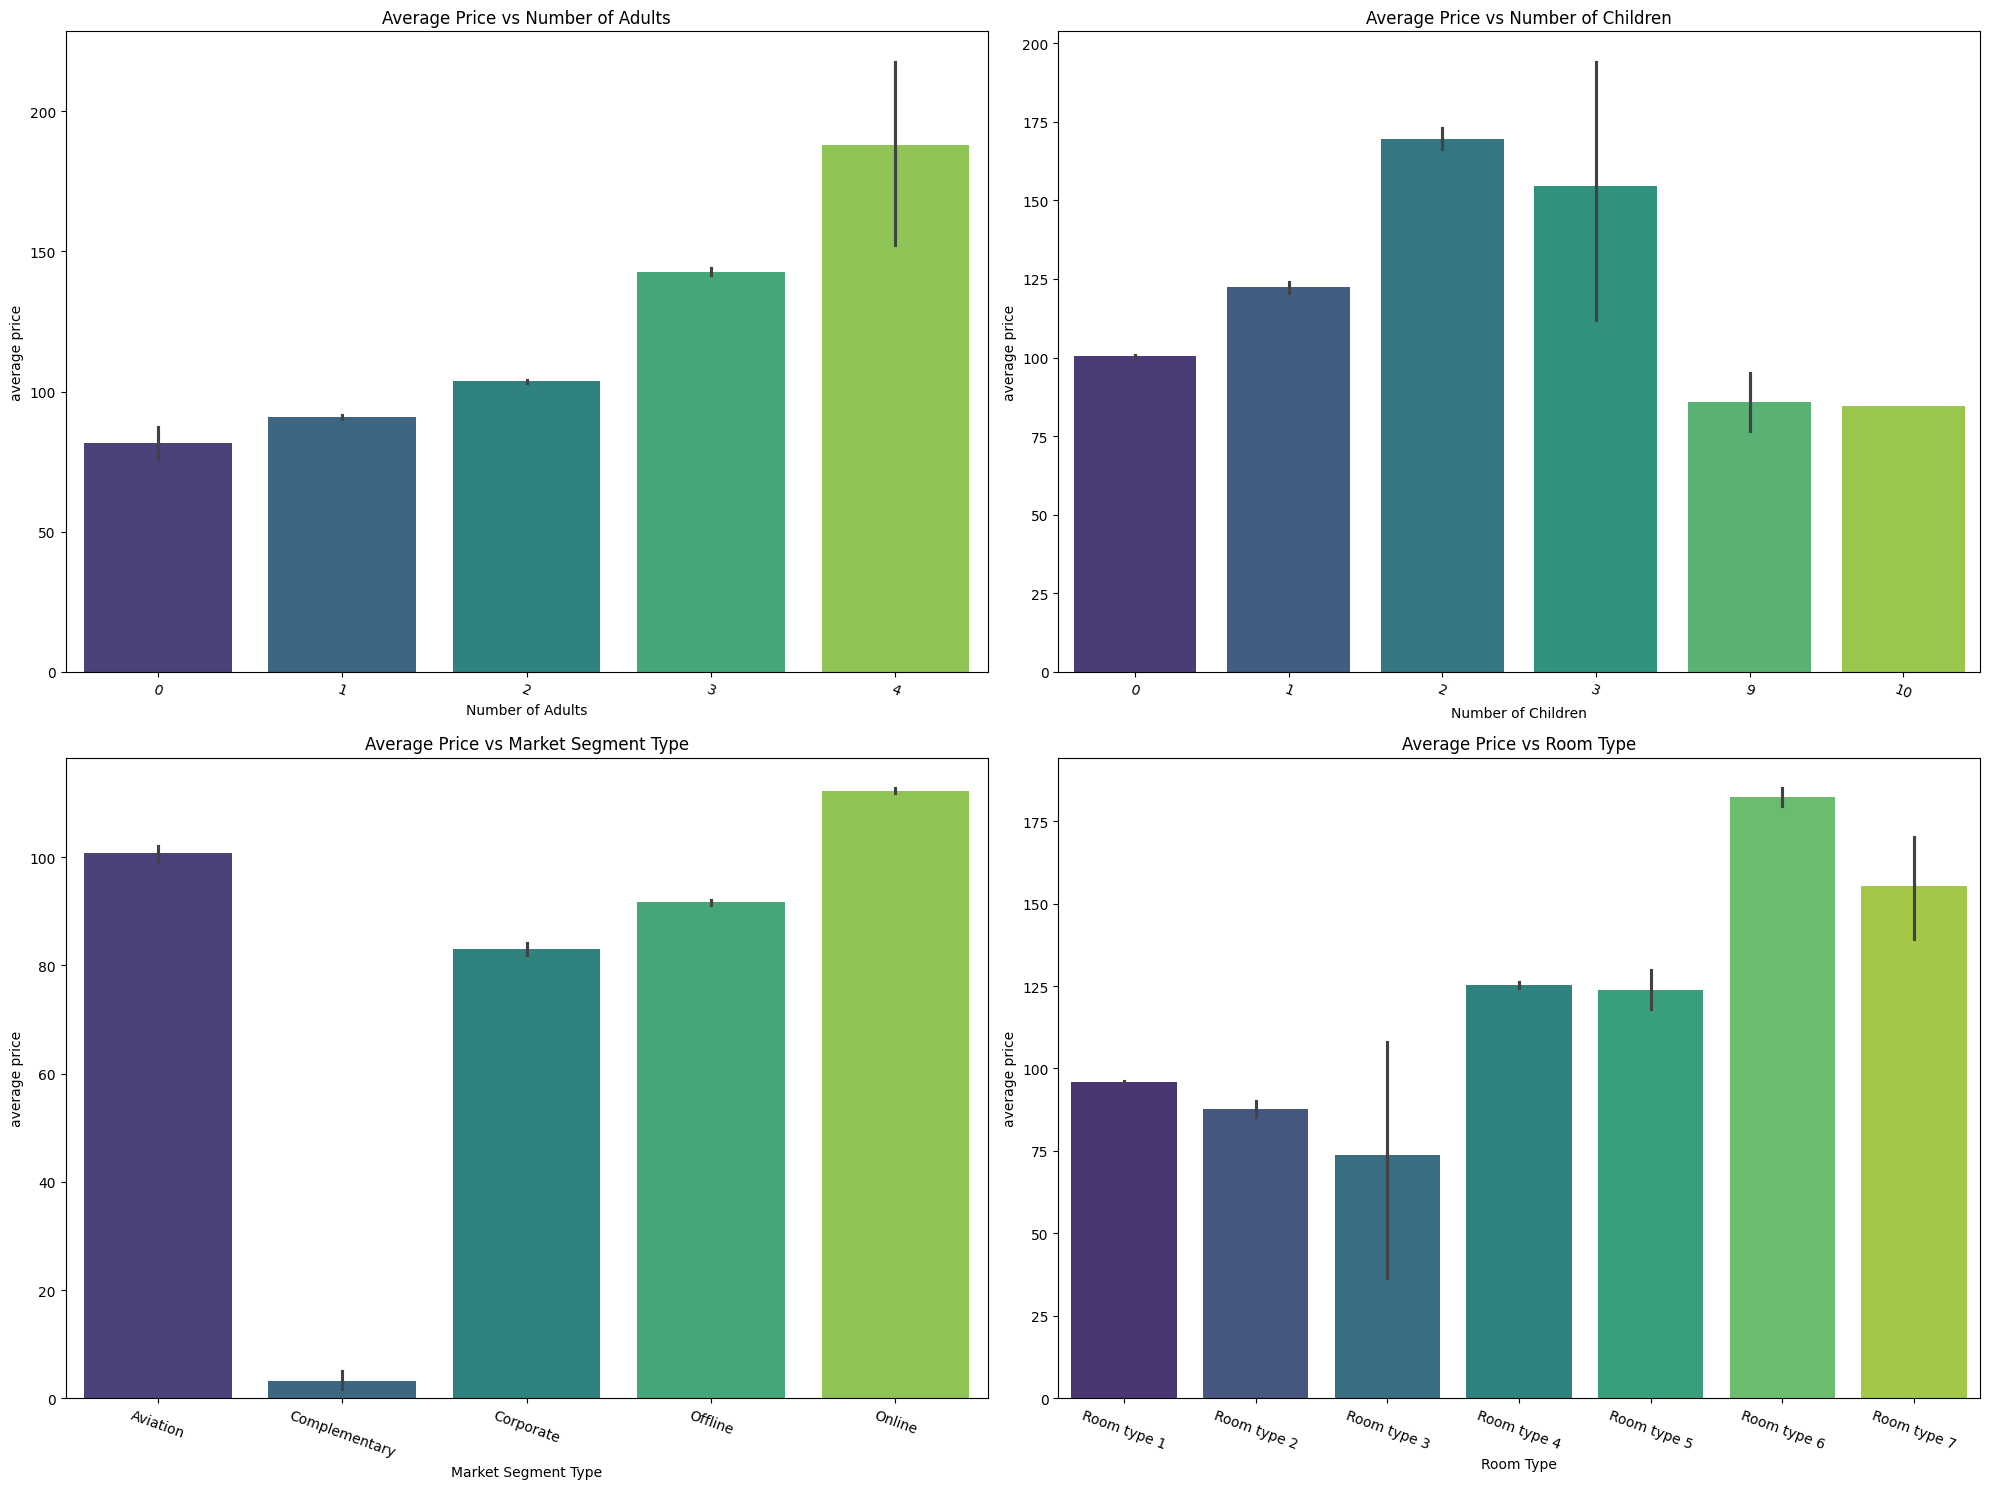

In [24]:
# Avg price versus number of adults, number of children, market segment type and room type
plt.figure(figsize=(20, 15))

# Plot 1: Average Price vs Number of Adults
plt.subplot(2, 2, 1)
sns.barplot(x='number of adults', y='average price', data=data_copy, palette='viridis')
plt.title('Average Price vs Number of Adults')
plt.xlabel('Number of Adults')
plt.xticks(rotation=-20)

# Plot 2: Average Price vs Number of Children
plt.subplot(2, 2, 2)
sns.barplot(x='number of children', y='average price', data=data_copy, palette='viridis')
plt.title('Average Price vs Number of Children')
plt.xlabel('Number of Children')
plt.xticks(rotation=-20)

# Plot 3: Average Price vs Market Segment Type
plt.subplot(2, 2, 3)
sns.barplot(x='market segment type', y='average price', data=data_copy, palette='viridis')
plt.title('Average Price vs Market Segment Type')
plt.xlabel('Market Segment Type')
plt.xticks(ticks=range(len(market_segment_mapping)), 
          labels=market_segment_mapping.values(), 
          rotation=-20)

# Plot 4: Average Price vs Room Type
plt.subplot(2, 2, 4)
sns.barplot(x='room type', y='average price', data=data_copy, palette='viridis')
plt.title('Average Price vs Room Type')
plt.xlabel('Room Type')
plt.xticks(ticks=range(len(Room_mapping)), 
          labels=Room_mapping.values(), 
          rotation=-20)

plt.tight_layout()
plt.show()


2. Market segment type Insights

C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_13564\1118619766.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_adults.index, y=avg_adults.values, palette='viridis')
C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_13564\1118619766.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_copy['market segment type'], y='average price', data=data_copy, palette='viridis')
C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_13564\1118619766.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_copy['market segment type'], y='spec

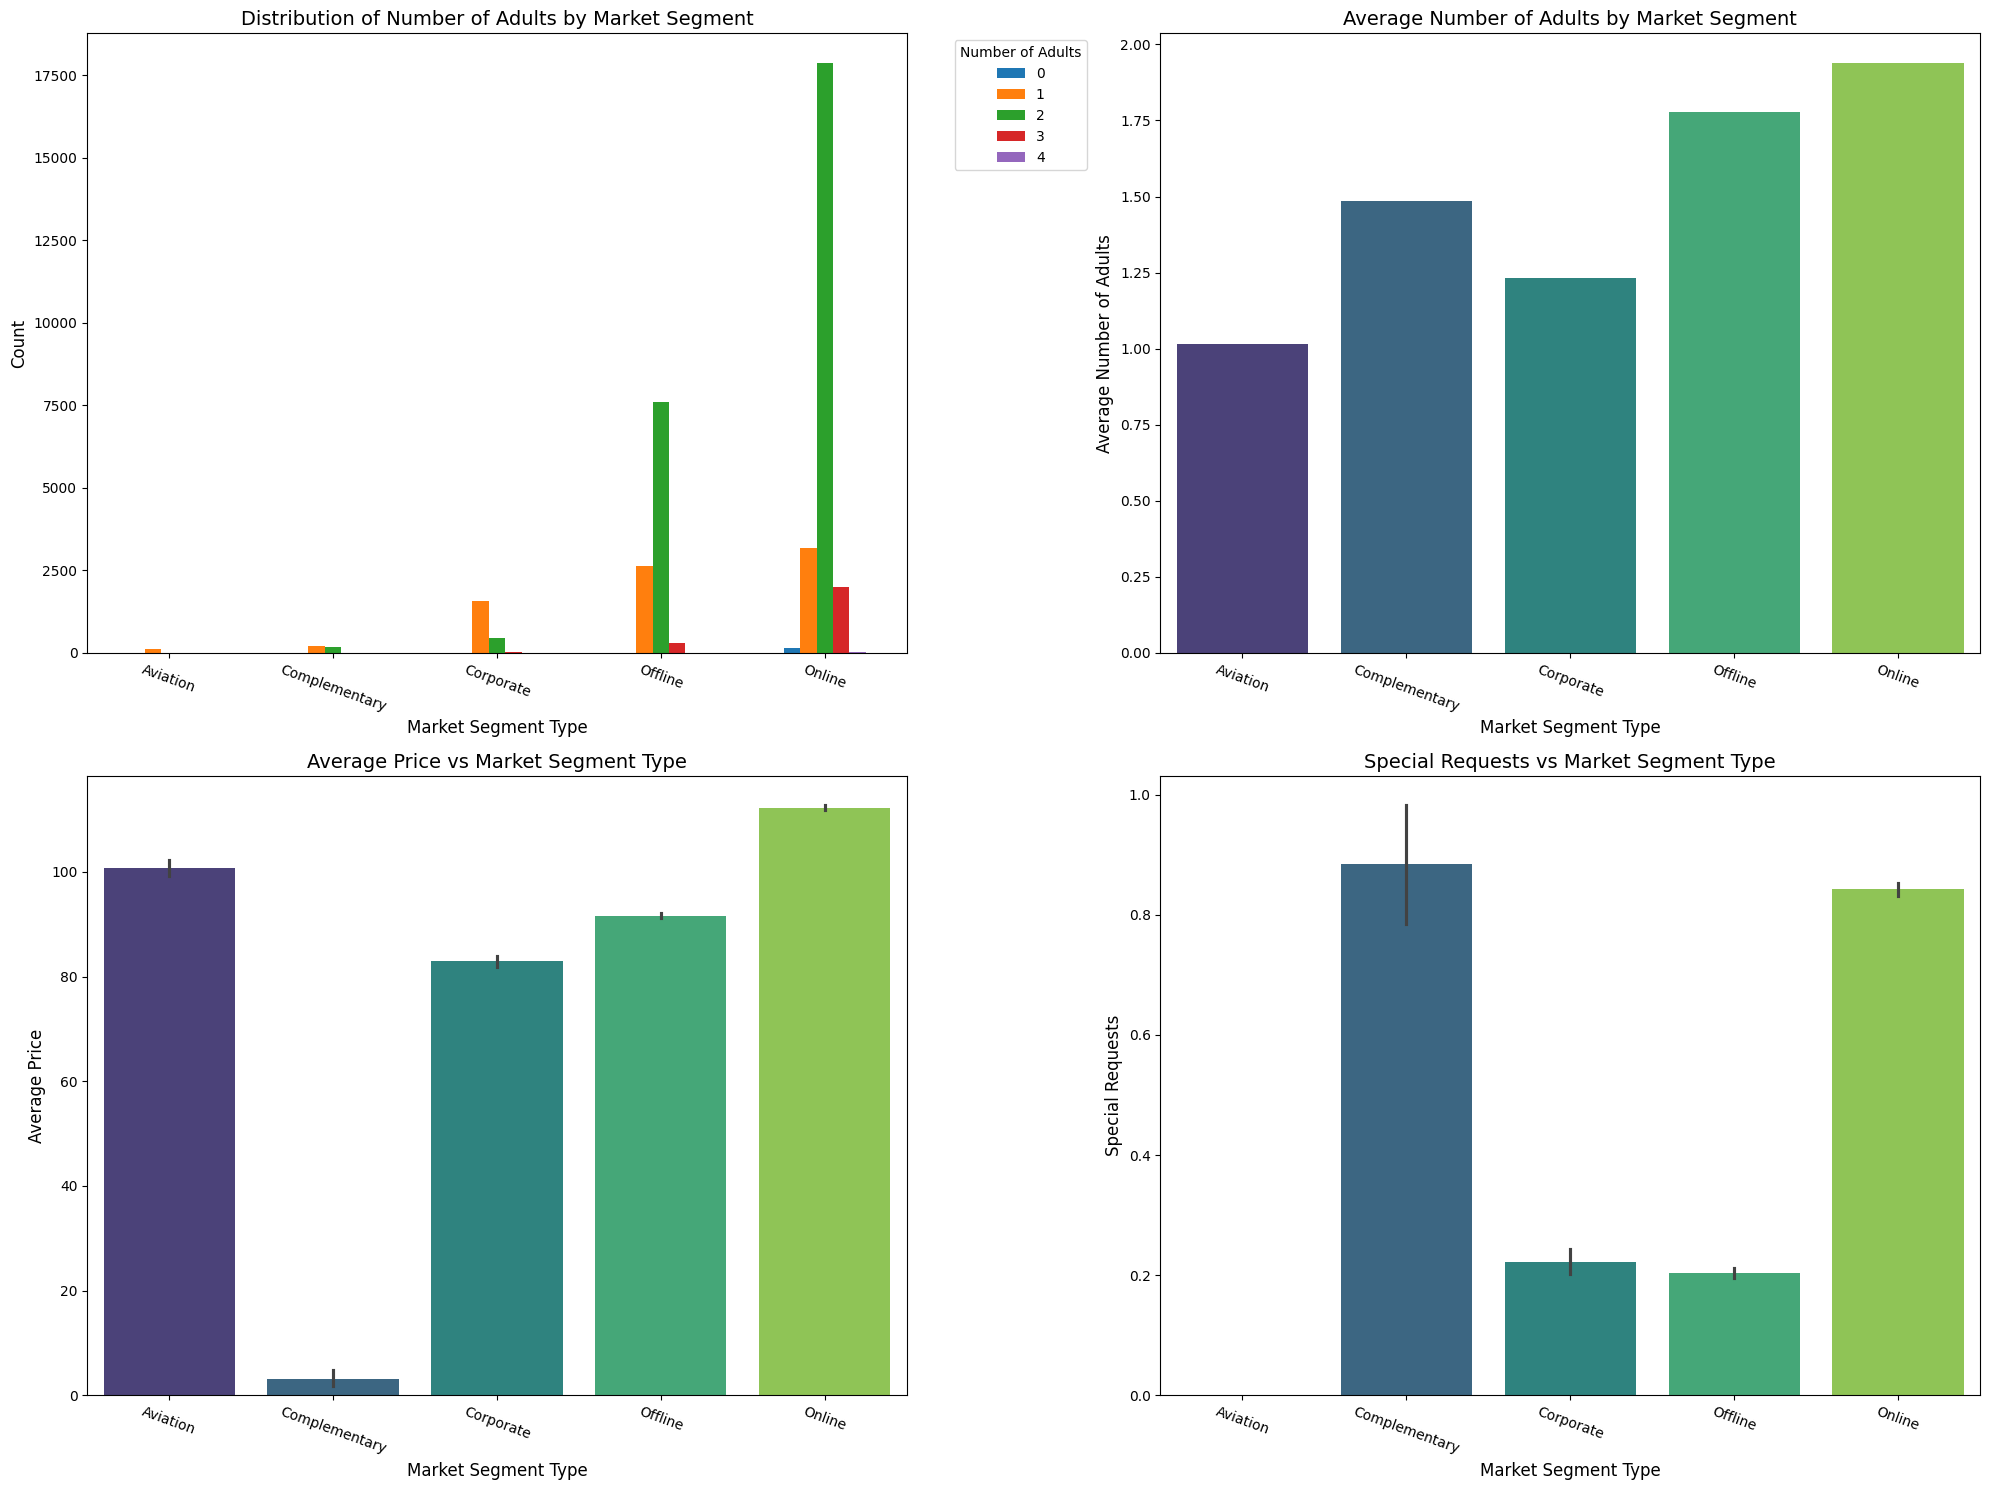

In [25]:
# Market segment type versus no of adults, average price and special request
plt.figure(figsize=(20, 15))

# Plot 1: Distribution of Number of Adults by Market Segment
plt.subplot(2, 2, 1)
adult_counts = data_copy.groupby(['market segment type', 'number of adults']).size().unstack()
adult_counts.plot(kind='bar', ax=plt.gca())
plt.title('Distribution of Number of Adults by Market Segment', fontsize=14)
plt.xlabel('Market Segment Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Number of Adults', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=range(len(market_segment_mapping)), labels=market_segment_mapping.values(), rotation=-20)

# Plot 2: Average Number of Adults by Market Segment
plt.subplot(2, 2, 2)
avg_adults = data_copy.groupby('market segment type')['number of adults'].mean()
sns.barplot(x=avg_adults.index, y=avg_adults.values, palette='viridis')
plt.title('Average Number of Adults by Market Segment', fontsize=14)
plt.xlabel('Market Segment Type', fontsize=12)
plt.ylabel('Average Number of Adults', fontsize=12)
plt.xticks(ticks=range(len(market_segment_mapping)), labels=market_segment_mapping.values(), rotation=-20)

# Plot 3: Average Price vs Market Segment Type
plt.subplot(2, 2, 3)
sns.barplot(x=data_copy['market segment type'], y='average price', data=data_copy, palette='viridis')
plt.title('Average Price vs Market Segment Type', fontsize=14)
plt.xlabel('Market Segment Type', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(ticks=range(len(market_segment_mapping)), labels=market_segment_mapping.values(), rotation=-20)

# Plot 4: Special Requests vs Market Segment Type
plt.subplot(2, 2, 4)
sns.barplot(x=data_copy['market segment type'], y='special requests', data=data_copy, palette='viridis')
plt.title('Special Requests vs Market Segment Type', fontsize=14)
plt.xlabel('Market Segment Type', fontsize=12)
plt.ylabel('Special Requests', fontsize=12)
plt.xticks(ticks=range(len(market_segment_mapping)), labels=market_segment_mapping.values(), rotation=-20)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

3. Old customer Insights

C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_13564\1064823488.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Old Customer', y='lead time', data=data_copy, palette='coolwarm', ax=axes[0, 0])


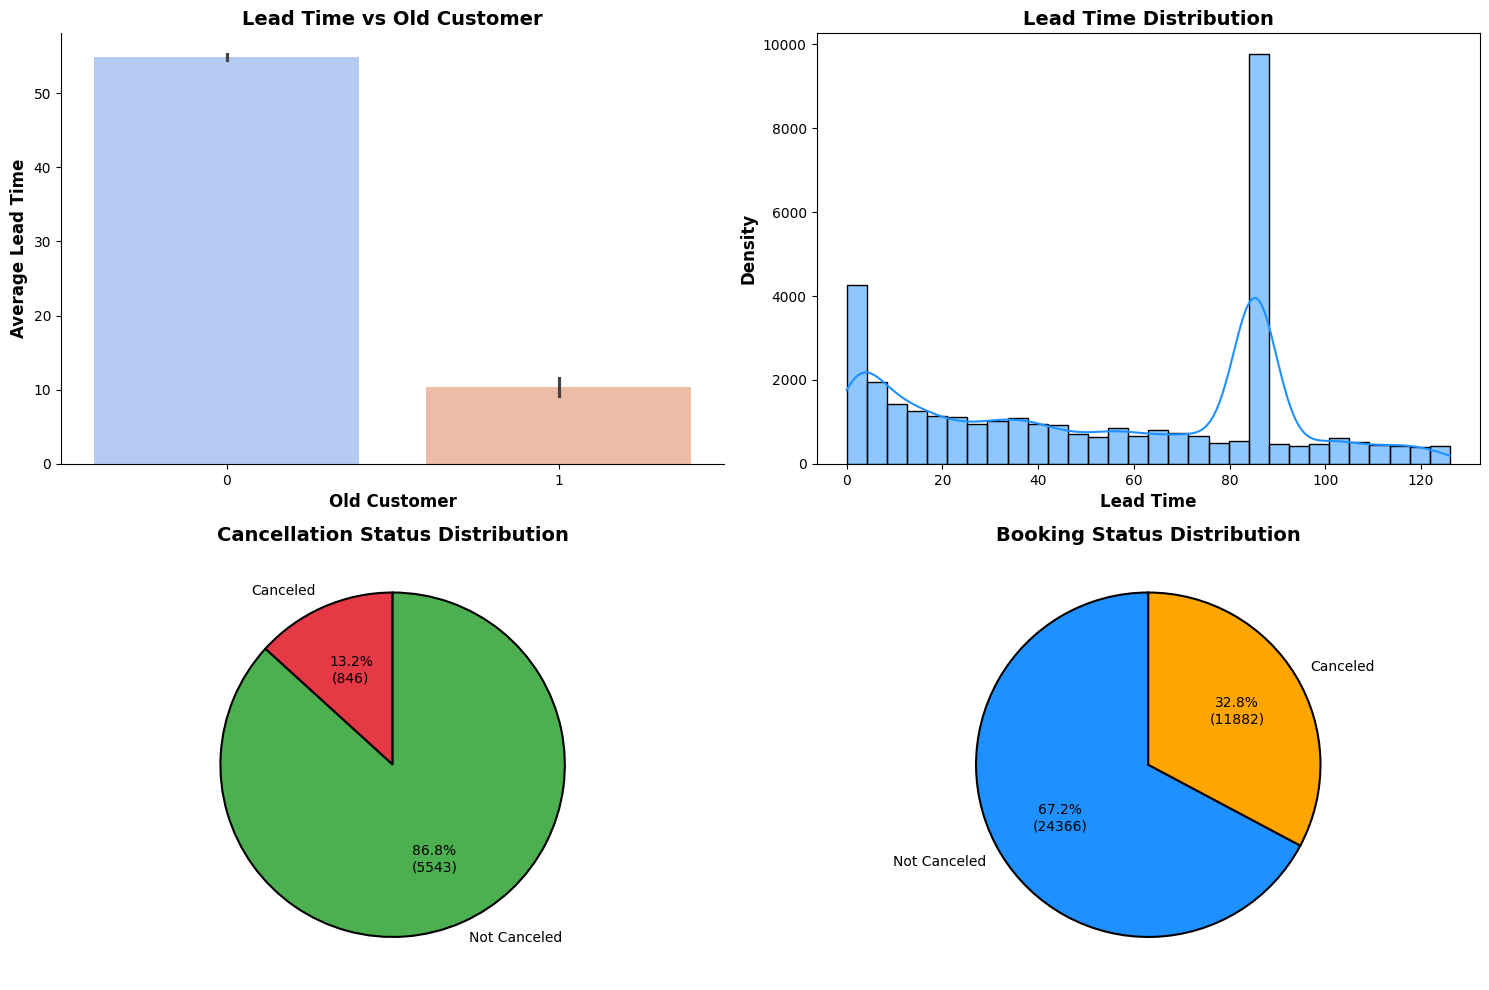

In [26]:
# old customer versus previous canceled and previous not cancelated , lead time and booking status

# Set figure size
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2 rows, 2 columns

# --- Bar Plot for Lead Time vs Old Customer ---
sns.barplot(x='Old Customer', y='lead time', data=data_copy, palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Lead Time vs Old Customer', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Old Customer', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Average Lead Time', fontsize=12, fontweight='bold')
axes[0, 0].spines['top'].set_visible(False)
axes[0, 0].spines['right'].set_visible(False)

# --- Distribution Plot for Lead Time ---
sns.histplot(data_copy['lead time'], kde=True, bins=30, color='#1E90FF', ax=axes[0, 1])
axes[0, 1].set_title('Lead Time Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Lead Time', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Density', fontsize=12, fontweight='bold')

# --- Pie Chart for Previously Canceled vs Not Canceled ---
canceled_counts = data_copy[['Previously Canceled', 'Previously not Canceled']].sum()
axes[1, 0].pie(canceled_counts, labels=['Canceled', 'Not Canceled'], 
               autopct=lambda p: f'{p:.1f}%\n({int(p*sum(canceled_counts)/100)})', 
               colors=['#E63946', '#4CAF50'], startangle=90, 
               wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
axes[1, 0].set_title('Cancellation Status Distribution', fontsize=14, fontweight='bold')

# --- Pie Chart for Booking Status ---
booking_counts = data_copy['booking status'].value_counts().rename({0: 'Canceled', 1: 'Not Canceled'})
axes[1, 1].pie(booking_counts, labels=booking_counts.index, 
               autopct=lambda p: f'{p:.1f}%\n({int(p*sum(booking_counts)/100)})',
               colors=['#1E90FF', '#FFA500'], startangle=90, 
               wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
axes[1, 1].set_title('Booking Status Distribution', fontsize=14, fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


4. Room type Insights

C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_13564\2371727220.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range(len(room_stats)), y=room_stats[('average price', 'mean')], palette='viridis')


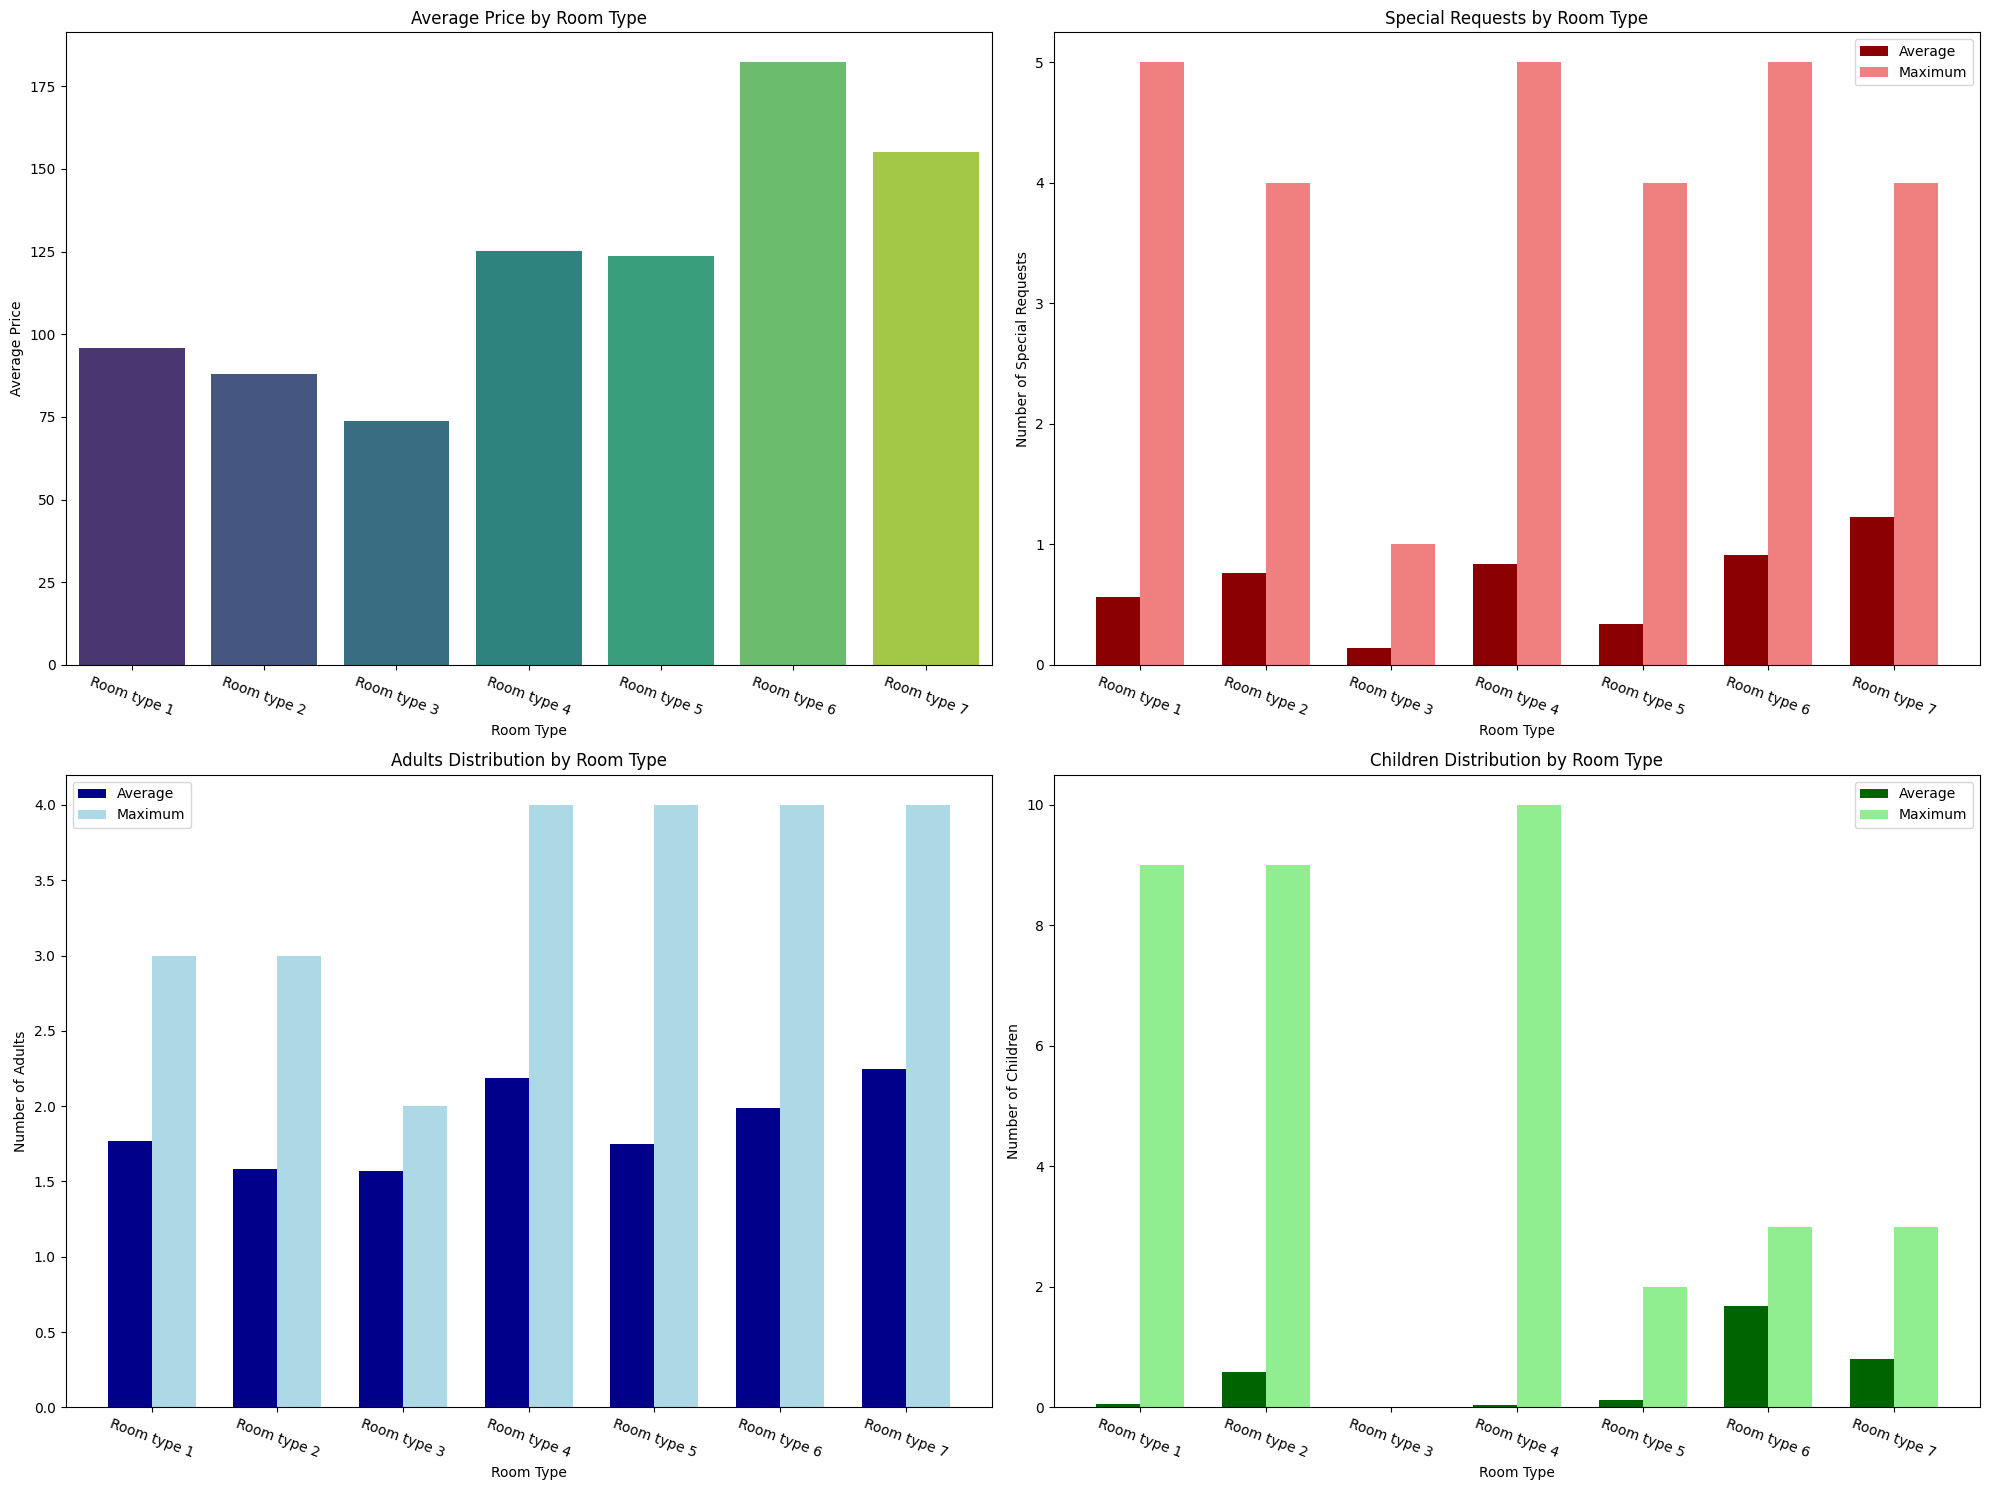

In [27]:
# Create a figure with multiple subplots
plt.figure(figsize=(20, 15))

# Calculate statistics for each room type separately
room_stats = data_copy.groupby('room type').agg({
    'average price': 'mean',
    'number of adults': ['mean', 'max'],
    'number of children': ['mean', 'max'],
    'special requests': ['mean', 'max']
}).round(2)

# Plot 1: Average Price vs Room Type
plt.subplot(2, 2, 1)
sns.barplot(x=range(len(room_stats)), y=room_stats[('average price', 'mean')], palette='viridis')
plt.title('Average Price by Room Type', fontsize=12)
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(range(len(room_stats)), Room_mapping.values(), rotation=-20)

# Plot 2: Special Requests Distribution by Room Type
plt.subplot(2, 2, 2)
ax = plt.gca()
x = np.arange(len(room_stats))
width = 0.35
ax.bar(x - width/2, room_stats[('special requests', 'mean')], width, label='Average', color='darkred')
ax.bar(x + width/2, room_stats[('special requests', 'max')], width, label='Maximum', color='lightcoral')
plt.title('Special Requests by Room Type', fontsize=12)
plt.xlabel('Room Type')
plt.ylabel('Number of Special Requests')
plt.legend()
plt.xticks(x, Room_mapping.values(), rotation=-20)

# Plot 3: Number of Adults Distribution by Room Type
plt.subplot(2, 2, 3)
ax = plt.gca()
ax.bar(x - width/2, room_stats[('number of adults', 'mean')], width, label='Average', color='darkblue')
ax.bar(x + width/2, room_stats[('number of adults', 'max')], width, label='Maximum', color='lightblue')
plt.title('Adults Distribution by Room Type', fontsize=12)
plt.xlabel('Room Type')
plt.ylabel('Number of Adults')
plt.legend()
plt.xticks(x, Room_mapping.values(), rotation=-20)

# Plot 4: Number of Children Distribution by Room Type
plt.subplot(2, 2, 4)
ax = plt.gca()
ax.bar(x - width/2, room_stats[('number of children', 'mean')], width, label='Average', color='darkgreen')
ax.bar(x + width/2, room_stats[('number of children', 'max')], width, label='Maximum', color='lightgreen')
plt.title('Children Distribution by Room Type', fontsize=12)
plt.xlabel('Room Type')
plt.ylabel('Number of Children')
plt.legend()
plt.xticks(x, Room_mapping.values(), rotation=-20)

plt.tight_layout()
plt.show()


5. Plots to show profits and reservations with dates

C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_13564\366813612.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='reservation_year', data=data_copy, palette='viridis')


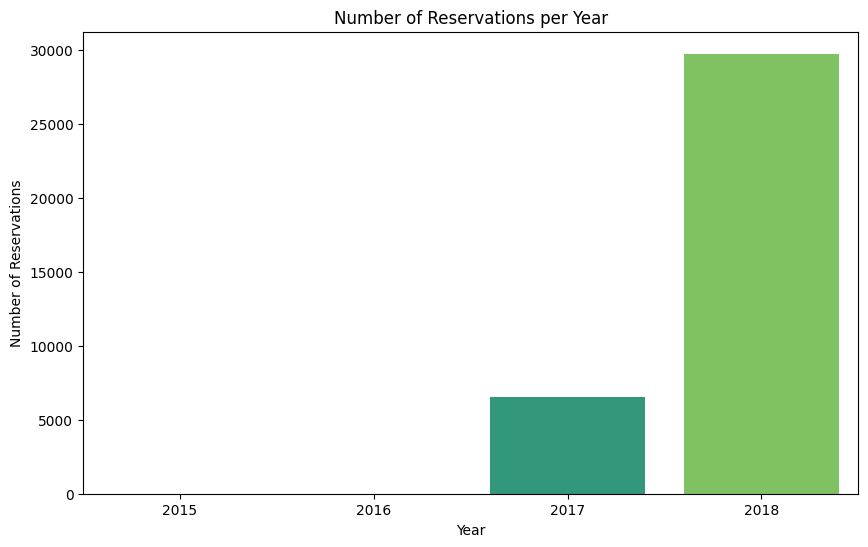

C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_13564\366813612.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='reservation_month', data=data_copy, palette='viridis')


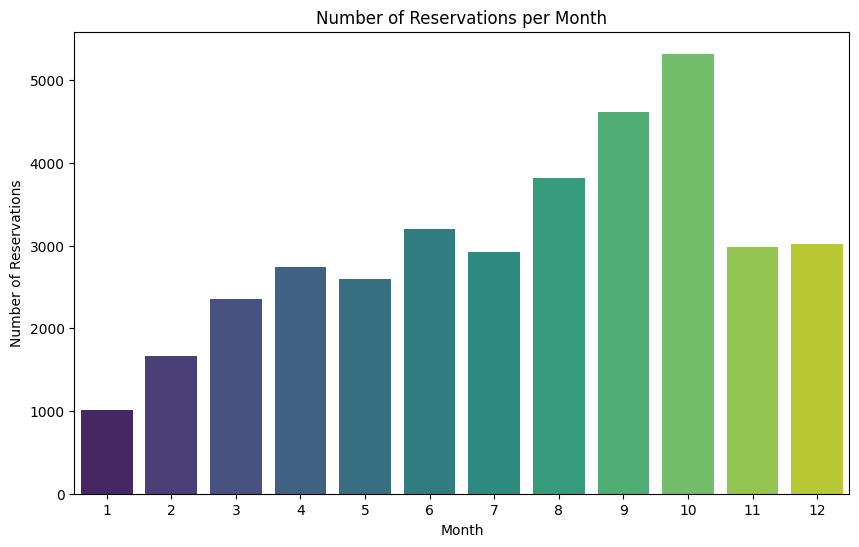

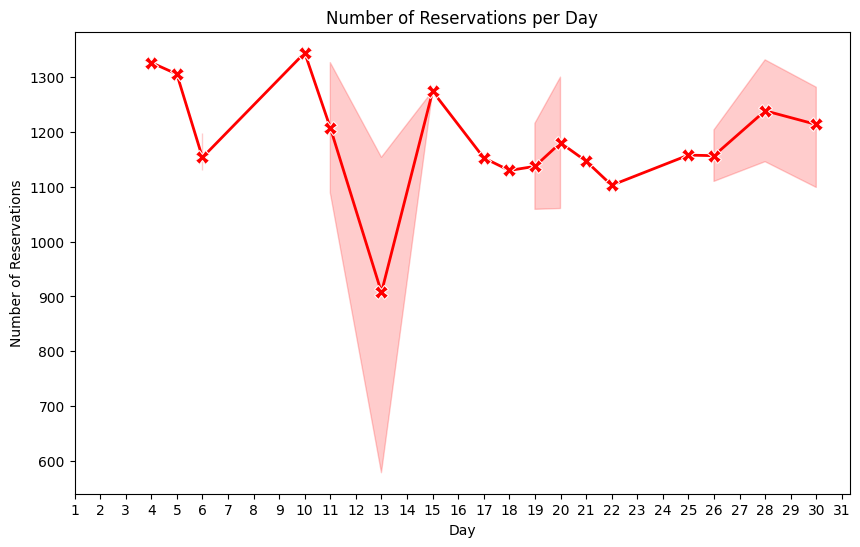

In [28]:
# Year wise reservations
plt.figure(figsize=(10, 6))
sns.countplot(x='reservation_year', data=data_copy, palette='viridis')
plt.title('Number of Reservations per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reservations')
plt.show()

# Month wise reservations
plt.figure(figsize=(10, 6))
sns.countplot(x='reservation_month', data=data_copy, palette='viridis')
plt.title('Number of Reservations per Month')
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.show()

# Day wise reservations using a line plot for better clarity
plt.figure(figsize=(10, 6))
sns.lineplot(x='reservation_day', y=data_copy['reservation_day'].value_counts().sort_index(), data=data_copy, marker='X' , color='red', markersize=10 , linewidth=2)
plt.title('Number of Reservations per Day')
plt.xlabel('Day')
plt.ylabel('Number of Reservations')
plt.xticks(range(1, 32))
plt.show()



##### 7- Drop Coasting features

In [29]:
# Drop weak features (correlation ≈ 0) and features that cause redundancy
features_to_drop = [
    "number of weekend nights", "number of week nights",
    "Previously Canceled", "Previously not Canceled",
    "reservation_day",
]

data_reduced = data_copy.drop(columns=features_to_drop)

# Save the cleaned data to a new CSV file
data_reduced.to_csv('reduced.csv', index=False)

# Verify the remaining columns
data_reduced.head()

,number of adults,number of children,type of meal,car parking space,room type,lead time,market segment type,Old Customer,average price,special requests,booking status,reservation_year,reservation_month
0,1,1,0,0,0,85.28236,3,0,88.00,0,1,2015,10
1,1,0,3,0,0,5.00000,4,0,106.68,1,1,2018,11
2,2,1,0,0,0,1.00000,4,0,50.00,0,0,2018,2
3,1,0,0,0,0,85.28236,4,0,100.00,1,0,2017,5
4,1,0,3,0,0,48.00000,4,0,77.00,0,0,2018,4
